In [17]:
from matplotlib import pyplot as plt
#from matplotlib import cm
#import matplotlib.gridspec as gridspec
import glob, os
import numpy as np
import importlib
import wrftools as wrf
from wrf import getvar
from netCDF4 import Dataset

importlib.reload(wrf)

run='run_land_SW'
run='run_CTRL_10m'
plist=sorted(glob.glob(os.path.join('..','run',run,'wrfout_d03*')))
plist=plist[0:6:1]
flist=[os.path.basename(p) for p in plist]

In [18]:
# print(flist)
xc=400
yc=400
Psfc=[wrf.getWRF(run,f,'P',z=0)[xc,yc] for f in flist]
P=[wrf.getWRF(run,f,'P',z=1)[xc,yc] for f in flist]
# Psfcp=[wrf.wrfout2var2d(p,'PSFC')[xc,yc]/100 for p in plist]
# Pp=[wrf.wrfout2var3d(p,'P')[xc,yc,0]/100 for p in plist]
PBp=[wrf.wrfout2var3d(p,'PB')[xc,yc,0]/100 for p in plist]

In [19]:
def pwrf_getp(p):
    nc=Dataset(p)
    return(getvar(nc,'pressure')[0,xc,yc])
    nc.close()
Pf=[pwrf_getp(p) for p in plist]


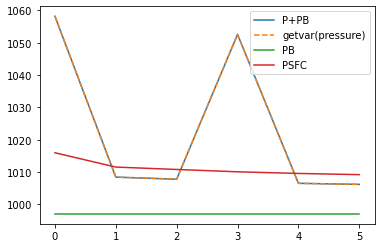

In [20]:
plt.plot(P)
plt.plot(Pf,linestyle='--')
# plt.plot(Psfcp,linestyle='--')
# plt.plot(Pp,linestyle='-')
plt.plot(PBp,linestyle='-')
plt.plot(Psfc,'-')
plt.legend(['P+PB','getvar(pressure)','PB','PSFC'])
plt.savefig('meeting/P_fail_tseries_06_CTRL.png',dpi=200,facecolor='white',edgecolor='white')
